In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # hoặc LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Đọc dữ liệu
fb = pd.read_csv('D:\\visua stiudio xanh\\hocki_3\\congnghephanmem\\fb_sentiment.csv')

In [3]:
# Chuẩn hóa tên cột và xử lý văn bản
fb.columns = map(str.lower, fb.columns)
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())
fb['fbpost'] = fb['fbpost'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
fb = fb[fb.label != "O"]  # Loại bỏ nhãn không xác định

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11884\4156425650.py:4: SyntaxWarning: invalid escape sequence '\s'
  fb['fbpost'] = fb['fbpost'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))


In [4]:
# Vector hóa văn bản
vectorizer = CountVectorizer(max_features=2000)
X = vectorizer.fit_transform(fb['fbpost'].values).toarray()
y = fb['label']

In [5]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Huấn luyện mô hình học máy cổ điển: Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:
# Đánh giá mô hình
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.55%


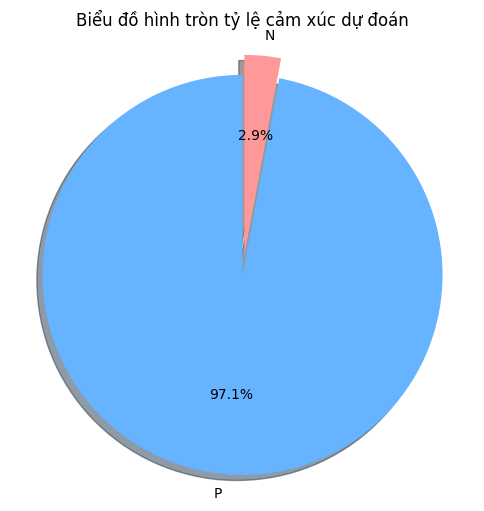

In [8]:
# Biểu đồ hình tròn thể hiện tỷ lệ cảm xúc dự đoán
label_counts = pd.Series(y_pred).value_counts()
labels = label_counts.index
sizes = label_counts.values
colors = ['#66b3ff', '#ff9999']
explode = [0.05] * len(labels)

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.title('Biểu đồ hình tròn tỷ lệ cảm xúc dự đoán')
plt.axis('equal')
plt.show()

In [9]:
# Dự đoán với một bình luận mới
cmnt = ['your customer service is the absolute worst i now have a mess of books on my kindle']
cmnt_vec = vectorizer.transform(cmnt).toarray()
sentiment = model.predict(cmnt_vec)[0]
print(f"Comment: {cmnt[0]}")
print("Predicted sentiment:", sentiment)

Comment: your customer service is the absolute worst i now have a mess of books on my kindle
Predicted sentiment: P
